# DNN, BDT and RF in TopFC analysis
Author: Meisam Ghasemi Bostanabad

## Loading `pandas` DataFrames
Now we load two different `NumPy` arrays. One corresponding to the VV signal and one corresponding to the background.

In [2]:
import uproot
import numpy as np
import pandas as pd
import h5py
import awkward as ak
import seaborn as sns
import matplotlib.pyplot as plt

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

filename = {
    'ttbar':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ttbar.root',
    'WZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/WZ.root',
    'ZZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ZZ.root',
    'signal_charm':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/signal_charm.root'
    }

'''
filename = {
    'ttbar':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ttbar.root',
    'WZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/WZ.root',
    'ZZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ZZ.root',
    'signal_up':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/signal_up.root'}
    }
'''

upfile = {}
params = {}
df = {}

# choose which vars to use (multi dimensional)
#VARS = ['jetNo','jetPTLeading','bjetPT','elecPTLeading','met','testnonTopMass', 'weight'] # choose which vars to use (2d)
VARS = ['jetNo','jetPTLeading', 'jetETA', 'jetPHI','bjetPT', 'bjetETA',
        'elecPTLeading', 'elecETA', 'elecPHI',
        'dielecCOS', 'dielecETA', 'met','testnonTopMass'] # choose which vars to use (2d)

# define trees and branches to make DataFrame
for treename in filename.keys():
    upfile[treename] = uproot.open(filename[treename])
    params[treename] = upfile[treename][treename].arrays(VARS)
    df[treename] = ak.to_dataframe(params[treename])
    # add isSignal variable
    if treename.startswith("signal"): 
        df[treename]['isSignal'] = np.ones(len(df[treename])) 
    else:
        df[treename]['isSignal'] = np.zeros(len(df[treename])) 

## Data exploration

In [3]:
# reduce signal DF size to have resonable Sig/Bkg ratio
df['signal_charm'] = df['signal_charm'][:3500]

In [4]:
print(len(df['signal_charm']))
#print(len(df['signal_charm'][df['isSignal']==1]))

3500


In [5]:
print(set(df['ttbar']['isSignal']))
print(set(df['ttbar']['jetNo']))
#print(set(df['ttbar']['weight']))
#print(set(df['signal_charm']['weight']))

{0.0}
{2, 3, 4, 5, 6}


In [6]:
# number of entries in the backgrounds and signals
tot_bkg = 0
for treename in filename.keys():
    if not 'signal' in treename: tot_bkg += df[treename].shape[0]
    print(treename, ":", df[treename].shape)

print("signal/tot bkg:", round((df['signal_charm'].shape[0]/ tot_bkg),1))
#print("Null entries:", df['signal_charm'].isna().sum())

ttbar : (915, 14)
WZ : (2176, 14)
ZZ : (174, 14)
signal_charm : (3500, 14)
signal/tot bkg: 1.1


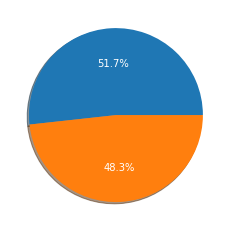

In [7]:
counts_signal = df['signal_charm'].shape[0]
counts_background = tot_bkg
plt.pie([counts_signal, counts_background], shadow=True, labels=['Signal ','Background'], textprops={'color':"w"}, autopct='%1.1f%%');

In [8]:
# show the correlation between features
plt.figure(figsize=(10,8))
#sns.heatmap(df_all.corr(), annot=True, linewidth=.5)
sns.heatmap(df_all.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1,cmap = plt.cm.CMRmap_r);

NameError: name 'df_all' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6765 entries, (0, 0) to (1418, 0)
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   jetNo           6765 non-null   int32  
 1   jetPTLeading    6765 non-null   float64
 2   jetETA          6765 non-null   float64
 3   jetPHI          6765 non-null   float64
 4   bjetPT          6765 non-null   float64
 5   bjetETA         6765 non-null   float64
 6   elecPTLeading   6765 non-null   float64
 7   elecETA         6765 non-null   float64
 8   elecPHI         6765 non-null   float64
 9   dielecCOS       6765 non-null   float64
 10  dielecETA       6765 non-null   float64
 11  met             6765 non-null   float64
 12  testnonTopMass  6765 non-null   float64
 13  isSignal        6765 non-null   float64
 14  NN_output_prob  6765 non-null   float64
 15  NN_output       6765 non-null   float64
 16  dense_NN        6765 non-null   float32
dtypes: float32(1), float64(

In [9]:
# Function to plot distributions of the float features
import math 
def hist(df1, df2, cols, bins, ncols = 3):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, figsize = (5 * ncols, 4.2 * nrows), sharey = False)
    for i in range(len(cols)):
        #sns.histplot(data = df, x = cols[i], bins = bins, hue = 'isSignal', palette = ['grey', 'red'], ax = ax[i // ncols, i % ncols], stat="probability")
        sns.histplot(data = df1, x = cols[i], bins = bins, color = 'red',
                      ax = ax[i // ncols, i % ncols], stat="density", label='bkg')
        sns.histplot(data = df2, x = cols[i], bins = bins, color = 'grey',
                      ax = ax[i // ncols, i % ncols], stat="density", label='sig')       
        ax[i // ncols, i % ncols].set_xlabel(cols[i])
        ax[i // ncols, i % ncols].legend()
        if i % ncols != 0:
            ax[i // ncols, i % ncols].set_ylabel(" ")
        
    plt.tight_layout()
    plt.show()

# Distributions of the float features
hist(df_all[df_all['isSignal']==0].replace(-999, np.nan),
     df_all[df_all['isSignal']==1].replace(-999, np.nan),
     #list(df_all.columns[df_all.dtypes == 'float64']),
     list(df_all.columns),
     bins = math.floor(len(df_all)**(1/3)),
     ncols = 3)

NameError: name 'df_all' is not defined

In [10]:
# function to make ML output and significant plot
samples =['ttbar', 'WZ', 'ZZ', 'signal_charm']

def plot_SoverB(data, SoverB_hist_dict):
    
    signal = r'signal_charm' # which sample is the signal

    # *******************
    # general definitions (shouldn't need to change)

    for x_variable,hist in SoverB_hist_dict.items(): # access the dictionary of histograms defined in the cell above

        h_bin_width = hist['bin_width'] # get the bin width defined in the cell above
        h_num_bins = hist['num_bins'] # get the number of bins defined in the cell above
        h_xrange_min = hist['xrange_min'] # get the x-range minimum defined in the cell above
        h_xlabel = hist['xlabel'] # get the x-axis label defined in the cell above
    
        bin_edges = [ h_xrange_min + x*h_bin_width for x in range(h_num_bins+1) ] # bin limits
        bin_centres = [ h_xrange_min+h_bin_width/2 + x*h_bin_width for x in range(h_num_bins) ] # bin centres
        
        signal_x = data[signal][x_variable] # histogram the signal
    
        mc_x = [] # define list to hold the Monte Carlo histogram entries

        for s in samples: # loop over samples
            if s not in ['data', signal]: # if not data nor signal
                mc_x = [*mc_x, *data[s][x_variable] ] # append to the list of Monte Carlo histogram entries
                #test=[]; test.append(df[s]['RF_output_prob'].values)


    
    
        # *************
        # Signal and background distributions
        # *************
        distributions_axes = plt.gca() # get current axes
 
        mc_heights = distributions_axes.hist(mc_x, bins=bin_edges, color='red', 
                                             label='Total background',
                                             histtype='step', # lineplot that's unfilled
                                             density=True ) # normalize to form probability density
        signal_heights = distributions_axes.hist(signal_x, bins=bin_edges, color='blue',
                                                 label=signal, 
                                                 histtype='step', # lineplot that's unfilled
                                                 density=True, # normalize to form probability density
                                                 linestyle='--' ) # dashed line
        
        distributions_axes.set_xlim( left=bin_edges[0], right=bin_edges[-1] ) # x-limits of the distributions axes
        distributions_axes.set_ylabel('Arbitrary units' ) # y-axis label for distributions axes
        y_max = max(max(signal_heights[0]), max(mc_heights[0]) )
        #distributions_axes.set_ylim( top=max(signal_heights[0])*1.3 ) # set y-axis limits
        distributions_axes.set_ylim( top=y_max*1.2 ) # set y-axis limits
        #distributions_axes.set_ylim( top=max(signal_heights[0])*1.3 ) # set y-axis limits
        plt.title('Signal and background '+x_variable+' distributions') # add title
        distributions_axes.legend() # draw the legend
        distributions_axes.set_xlabel( h_xlabel ) # x-axis label
            
        plt.show() # show the Signal and background distributions
    
    
        # *************
        # Signal to background ratio
        # *************
        plt.figure() # start new figure
        SoverB = [] # list to hold S/B values
        for cut_value in bin_edges: # loop over bins
            #signal_weights_passing_cut = sum(data[signal][data[signal][x_variable]>cut_value].totalWeight)
            signal_weights_passing_cut = len(data[signal][data[signal][x_variable]>cut_value])
            background_weights_passing_cut = 0 # start counter for background weights passing cut
            for s in samples: # loop over samples
                if s not in ['data', signal]: # if not data nor signal
                    #background_weights_passing_cut += sum(data[s][data[s][x_variable]>cut_value].totalWeight)
                    background_weights_passing_cut += len(data[s][data[s][x_variable]>cut_value])
            if background_weights_passing_cut!=0: # some background passes cut
                SoverB_value = signal_weights_passing_cut/background_weights_passing_cut
                SoverB_percent = 100*SoverB_value # multiply by 100 for percentage
                SoverB.append(SoverB_percent) # append to list of S/B values
        
        SoverB_axes = plt.gca() # get current axes
        SoverB_axes.plot( bin_edges[:len(SoverB)], SoverB ) # plot the data points
        SoverB_axes.set_xlim( left=bin_edges[0], right=bin_edges[-1] ) # set the x-limit of the main axes
        #SoverB_axes.set_ylim( 100, 1000)
        SoverB_axes.set_ylabel( 'S/B (%)' ) # write y-axis label for main axes
        plt.title('Signal to background ratio for different '+x_variable+' cut values', family='sans-serif')
        SoverB_axes.set_xlabel( h_xlabel ) # x-axis label 
        
        plt.show() # show S/B plot
    
    return

## Define the models

## NN from Tensorflow
We'll start with a dense (fully-connected) NN layer.
Our model will have a single fully-connected hidden layer with the same number of neurons as input variables. 
The weights are initialized using a small Gaussian random number. 
We will switch between linear and tanh activation functions for the hidden layer.
The output layer contains a single neuron in order to make predictions. 
It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1.

We are using the `binary_crossentropy` loss function during training, a standard loss function for binary classification problems. 
We will optimize the model with the Adam algorithm for stochastic gradient descent and we will collect accuracy metrics while the model is trained.

## Dividing the data into testing and training dataset

We will split the data into two parts (one for training+validation and one for testing). 
We will also apply "standard scaling" preprocessing: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html i.e. making the mean = 0 and the RMS = 1 for all input variables (based **only** on the training/validation dataset).
We will also define our early stopping criteria to prevent over-fitting and we will save the model based on the best `val_loss`.

In [11]:
NDIM = len(VARS)
df_all = pd.concat([df[treename] for treename in filename.keys()])
dataset = df_all.values
X = dataset[:,0:NDIM]
Y = dataset[:,NDIM]

from sklearn.model_selection import train_test_split
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_val)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

# baseline keras model
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from tensorflow import keras

inputs = Input(shape=(NDIM,), name = 'input') 
hidden1 = Dense(20, name = 'hidden1', kernel_initializer='normal', activation='relu')(inputs)
hidden2 = Dense(20, name = 'hidden2', kernel_initializer='normal', activation='relu')(hidden1)
outputs = Dense(1, name = 'output', kernel_initializer='normal', activation='sigmoid')(hidden2)

# create the model
model = Model(inputs=inputs, outputs=outputs)
# compile the model
optimizer = SGD(learning_rate=1e-3) # define the optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('TopFC_dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 hidden1 (Dense)             (None, 20)                280       
                                                                 
 hidden2 (Dense)             (None, 20)                420       
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


## Run training 
Here, we run the training.

In [12]:
# Train classifier
import time
start = time.time() # time at start of whole processing

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs=1000, 
                    batch_size=512, 
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint], 
                    validation_data=(X_test,Y_test))

elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Epoch 1/1000
11/11 [==============================] - 1s 26ms/step - loss: 0.6932 - accuracy: 0.5092 - val_loss: 0.6929 - val_accuracy: 0.5225
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5512 - val_loss: 0.6923 - val_accuracy: 0.5366
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5639 - val_loss: 0.6912 - val_accuracy: 0.5455
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6897 - accuracy: 0.5804 - val_loss: 0.6888 - val_accuracy: 0.5743
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6862 - accuracy: 0.5957 - val_loss: 0.6844 - val_accuracy: 0.5868
Epoch 6/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.6031 - val_loss: 0.6778 - val_accuracy: 0.6031
Epoch 7/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6718 - accuracy: 0.6123 - val_loss: 0.6697 - val_accuracy: 0.6142
Epoch

## Plot performance and reports
Here, we plot the history of the training and the performance in a ROC curve

170/170 [==============================] - 0s 707us/step


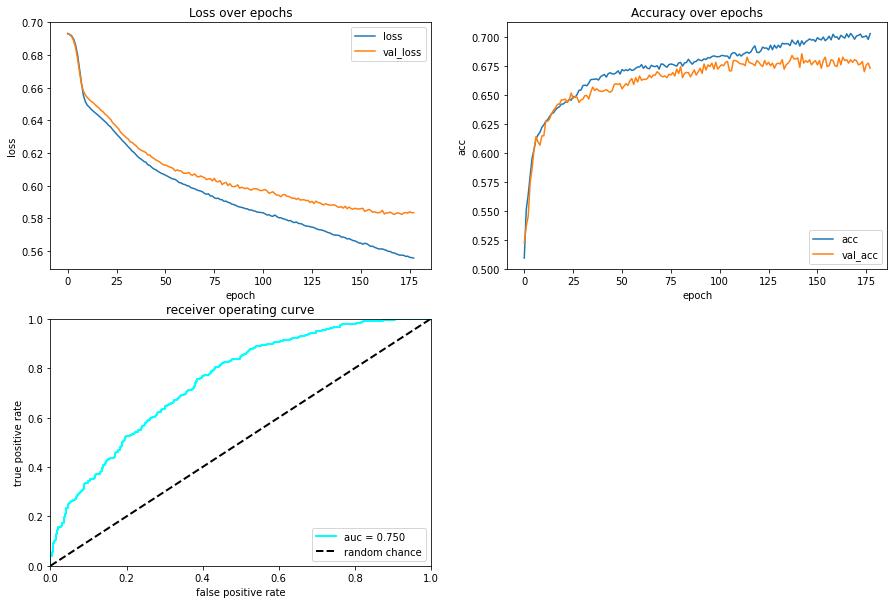

212/212 [==============================] - 0s 704us/step
Test acc score: 0.6733185513673319
Train acc score: 0.7036215816703622
Classification report for the test set
              precision    recall  f1-score   support

  background       0.68      0.64      0.66       666
      signal       0.67      0.70      0.69       687

    accuracy                           0.67      1353
   macro avg       0.67      0.67      0.67      1353
weighted avg       0.67      0.67      0.67      1353

Classification report for the total set
              precision    recall  f1-score   support

  background       0.69      0.67      0.68      3265
      signal       0.70      0.73      0.71      3500

    accuracy                           0.70      6765
   macro avg       0.70      0.70      0.70      6765
weighted avg       0.70      0.70      0.70      6765

Confusion matrix for total set
[[2179 1086]
 [ 960 2540]]
212/212 [==============================] - 0s 686us/step


In [13]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

%matplotlib inline
def loss_accuracy_plotter(history):
    # plot loss vs epoch
    plt.figure(figsize=(15,10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.legend(loc="upper right")
    ax.set_title('Loss over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

    # plot accuracy vs epoch
    ax = plt.subplot(2, 2, 2)
    ax.plot(history.history['accuracy'], label='acc')
    ax.plot(history.history['val_accuracy'], label='val_acc')
    ax.legend(loc="lower right")
    ax.set_title('Accuracy over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')

    # Plot ROC
    Y_predict = model.predict(X_test)
    Y_predict_train = model.predict(X_train_val)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('receiver operating curve')
    ax.legend(loc="lower right")
    plt.show()

loss_accuracy_plotter(history)


from sklearn.metrics import accuracy_score, classification_report

Y_pred_test = model.predict(X_test)
Y_pred_test = Y_pred_test.reshape(Y_pred_test.shape[0])
Y_pred_train = model.predict(X_train_val)
Y_pred_train = Y_pred_train.reshape(Y_pred_train.shape[0])
Y_pred_tot = model.predict(scaler.transform(X)).round()
Y_pred_train = Y_pred_train.reshape(Y_pred_train.shape[0])

# accuracy score
print("Test acc score:", accuracy_score(Y_test.round(), Y_pred_test.round()))
print("Train acc score:", accuracy_score(Y_train_val.round(), Y_pred_train.round()))

# classification report for the test and total sets
print("Classification report for the test set")
print(classification_report(Y_test.round(), Y_pred_test.round(), target_names=['background', 'signal']))
print("Classification report for the total set")
print(classification_report(Y.round(), Y_pred_tot.round(), target_names=['background', 'signal']))

print("Confusion matrix for total set")
print(confusion_matrix(Y.round(), Y_pred_tot.round()))

fpr_nn, tpr_nn, thresholds_nn = roc_curve(Y_test, Y_pred_test) # get FPRs, TPRs and thresholds for neural network

df_all['dense_NN'] = model.predict(scaler.transform(X)).round() # add prediction to array
#df_all['dense_NN'] = model.predict_proba(X)[:, 1]
#print (df_all.iloc[:5])

212/212 [==============================] - 0s 821us/step


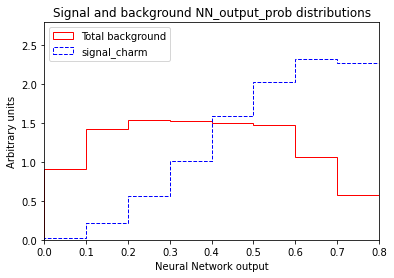

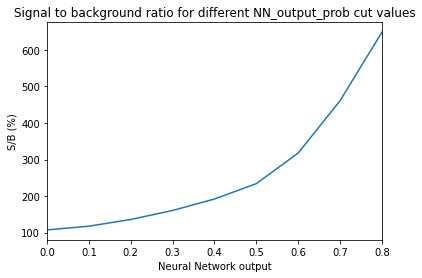

In [14]:
# add TF NN probability
y_tot_prob_NN = model.predict(scaler.transform(X))
y_tot_NN = model.predict(scaler.transform(X)).round()

cumulative_events = 0 # start counter for total number of events for which output is saved
for key in filename.keys(): # loop over samples
    df[key]['NN_output_prob'] = y_tot_prob_NN[cumulative_events:cumulative_events+len(df[key])]
    df[key]['NN_output'] = y_tot_NN[cumulative_events:cumulative_events+len(df[key])]
    cumulative_events += len(df[key]) # increment counter for total number of events
    #print(df[key]['RF_output']) # print the dataframe column NN_output

# probability and significance plots
NN_output_prob = { # dictionary containing plotting parameters for the mllll histogram
    # change plotting parameters
    'bin_width':0.1, # width of each histogram bin
    'num_bins':8, # number of histogram bins
    'xrange_min':0, # minimum on x-axis
    'xlabel':'Neural Network output', # x-axis label
}

SoverB_hist_dict = {'NN_output_prob':NN_output_prob}
plot_SoverB(df, SoverB_hist_dict)

## NN Hyperparameter optimization

In [15]:
def main():
        
    keras_pipeline = Pipeline([("scaler", StandardScaler()),
                               ("clf", keras.wrappers.scikit_learn.KerasClassifier(
                                   build_fn=make_model))
    ])
    
    param_grid = {'clf__network_layers': [(32, 32), (64, 64), (128, 128, 128)],
     'clf__batch_size': [64, 128, 256, 512],
     'clf__epochs': [5, 10, 15, 50, 100, 200],
     'clf__dropout_rate': [0.1, 0.01],
     'clf__optimizer': ['Nadam', 'Adam', 'SGD'],
     'clf__activation': ['selu', 'relu', 'tanh'],
     'clf__k_initializer': ['lecun_normal', 'normal'],
     'clf__verbose': [0]
    }
    
    rs_keras = RandomizedSearchCV(keras_pipeline,
                                  param_distributions=param_grid,
                                  cv=5, refit=True,
                                  verbose=0,
                                  n_iter=5,
                                  scoring="accuracy")
    
    history = rs_keras.fit(np.array(X_train_val),
                 np.array(Y_train_val))
    
    print('Best score obtained: {0}'.format(rs_keras.best_score_))
    print('Parameters:')
    for param, value in rs_keras.best_params_.items():
        print('\t{}: {}'.format(param, value))
    return  rs_keras  

def make_model(network_layers=[(32, 32)],
               dropout_rate=0,
               optimizer="Nadam",
               activation="selu",
               k_initializer='lecun_normal',
               n_input=NDIM,
               n_class=1):
    
    model = keras.models.Sequential()

    for index, layers in enumerate(network_layers):
        if not index:
            model.add(keras.layers.Dense(layers,
                                         input_dim=n_input,
                                         activation=activation,
                                         kernel_initializer=k_initializer))
        else:
            model.add(keras.layers.Dense(layers,
                                         kernel_initializer=k_initializer,
                                         activation=activation))
        if dropout_rate and index:
            model.add(keras.layers.AlphaDropout(dropout_rate))

    model.add(keras.layers.Dense(n_class,
                                 activation="sigmoid"))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    #print(model.summary())
    return model

if __name__ == '__main__':
    opt_model = main()

<ipython-input-15-7b86a5d1fe7c>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("clf", keras.wrappers.scikit_learn.KerasClassifier(


34/34 [==============================] - 0s 918us/step
Best score obtained: 0.6960474686082849
Parameters:
	clf__verbose: 0
	clf__optimizer: Nadam
	clf__network_layers: (128, 128, 128)
	clf__k_initializer: normal
	clf__epochs: 200
	clf__dropout_rate: 0.1
	clf__batch_size: 256
	clf__activation: selu


In [16]:
opt_model

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe642490880>)]),
                   n_iter=5,
                   param_distributions={'clf__activation': ['selu', 'relu',
                                                            'tanh'],
                                        'clf__batch_size': [64, 128, 256, 512],
                                        'clf__dropout_rate': [0.1, 0.01],
                                        'clf__epochs': [5, 10, 15, 50, 100,
                                                        200],
                                        'clf__k_initializer': ['lecun_normal',
                                                               'normal'],
                                        'clf__network_layers': [(32, 32),
                                 

In [17]:
inputs = Input(shape=(NDIM,), name = 'input') 
hidden1 = Dense(128, name = 'hidden1', kernel_initializer='lecun_normal', activation='selu')(inputs)
#drop1 = Dropout(0.1)
hidden2 = Dense(128, name = 'hidden2', kernel_initializer='lecun_normal', activation='selu')(hidden1)
#drop2 = Dropout(0.1)
hidden3 = Dense(128, name = 'hidden3', kernel_initializer='lecun_normal', activation='selu')(hidden2)
#drop3 = Dropout(0.1)
outputs = Dense(1, name = 'output', kernel_initializer='lecun_normal', activation='sigmoid')(hidden3)

# create the model
opt_model = Model(inputs=inputs, outputs=outputs)
# compile the model
opt_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
opt_model.summary()

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('TopFC_opt_dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 hidden1 (Dense)             (None, 128)               1792      
                                                                 
 hidden2 (Dense)             (None, 128)               16512     
                                                                 
 hidden3 (Dense)             (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Train classifier
import time
start = time.time() # time at start of whole processing

opt_history = opt_model.fit(X_train_val, 
                    Y_train_val, 
                    epochs=500, 
                    batch_size=64, 
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint], 
                    validation_data=(X_test,Y_test))

elapsed = time.time() - start # time after whole processing
print("Time taken: "+str(round(elapsed,1))+"s") # print total time taken to process every file

Epoch 1/500
85/85 [==============================] - 1s 5ms/step - loss: 0.6838 - accuracy: 0.5926 - val_loss: 0.6757 - val_accuracy: 0.6075
Epoch 2/500
85/85 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6317 - val_loss: 0.6486 - val_accuracy: 0.6135
Epoch 3/500
85/85 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6471 - val_loss: 0.6511 - val_accuracy: 0.6194
Epoch 4/500
85/85 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6619 - val_loss: 0.6366 - val_accuracy: 0.6245
Epoch 5/500
85/85 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6674 - val_loss: 0.6211 - val_accuracy: 0.6460
Epoch 6/500
85/85 [==============================] - 0s 3ms/step - loss: 0.6000 - accuracy: 0.6700 - val_loss: 0.6135 - val_accuracy: 0.6556
Epoch 7/500
85/85 [==============================] - 0s 4ms/step - loss: 0.5914 - accuracy: 0.6857 - val_loss: 0.6168 - val_accuracy: 0.6637
Epoch 8/500
8

170/170 [==============================] - 0s 850us/step


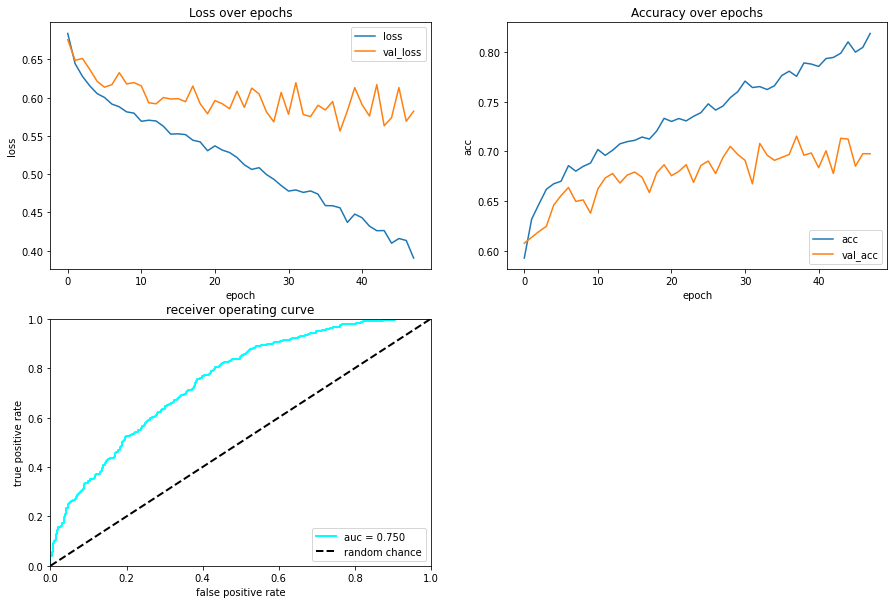

212/212 [==============================] - 0s 708us/step
Test acc score: 0.6977087952697709
Train acc score: 0.8314855875831486



Classification report for the test set
              precision    recall  f1-score   support

  background       0.68      0.73      0.70       666
      signal       0.72      0.67      0.69       687

    accuracy                           0.70      1353
   macro avg       0.70      0.70      0.70      1353
weighted avg       0.70      0.70      0.70      1353

Classification report for the total set
              precision    recall  f1-score   support

  background       0.78      0.82      0.80      3265
      signal       0.83      0.79      0.81      3500

    accuracy                           0.80      6765
   macro avg       0.81      0.81      0.80      6765
weighted avg       0.81      0.80      0.80      6765

Confusion matrix for training set
[[2686  579]
 [ 742 2758]]
212/212 [==============================] - 0s 670us/step


In [19]:
loss_accuracy_plotter(opt_history)

opt_Y_pred_test = opt_model.predict(X_test)
opt_Y_pred_test = opt_Y_pred_test.reshape(opt_Y_pred_test.shape[0])
opt_Y_pred_train = opt_model.predict(X_train_val)
opt_Y_pred_train = opt_Y_pred_train.reshape(opt_Y_pred_train.shape[0])
opt_Y_pred_tot = opt_model.predict(scaler.transform(X)).round()
opt_Y_pred_tto = opt_Y_pred_tot.reshape(opt_Y_pred_tot.shape[0])

# accuracy score
print("Test acc score:", accuracy_score(Y_test.round(), opt_Y_pred_test.round()))
print("Train acc score:", accuracy_score(Y_train_val.round(), opt_Y_pred_train.round()))
print("\n\n")

# classification report for the test and total sets
print("Classification report for the test set")
print(classification_report(Y_test.round(), opt_Y_pred_test.round(), target_names=['background', 'signal']))
print("Classification report for the total set")
print(classification_report(Y.round(), opt_Y_pred_tot.round(), target_names=['background', 'signal']))

print("Confusion matrix for training set")
print(confusion_matrix(Y.round(), opt_Y_pred_tot.round()))

fpr_nn_opt, tpr_nn_opt, thresholds_nn_opt = roc_curve(Y_test, opt_Y_pred_test) # get FPRs, TPRs and thresholds for neural network

df_all['dense_NN_opt'] = model.predict(scaler.transform(X)).round() # add prediction to array
#df_all['dense_NN'] = model.predict_proba(X)[:, 1]
#print (df_all.iloc[:5])

212/212 [==============================] - 0s 933us/step


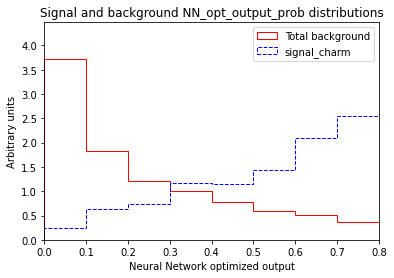

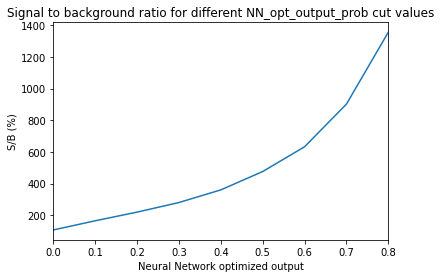

In [20]:
# add TF NN probability
y_tot_prob_NN_opt = opt_model.predict(scaler.transform(X))
y_tot_NN_opt = opt_model.predict(scaler.transform(X)).round()

cumulative_events = 0 # start counter for total number of events for which output is saved
for key in filename.keys(): # loop over samples
    df[key]['NN_opt_output_prob'] = y_tot_prob_NN_opt[cumulative_events:cumulative_events+len(df[key])]
    df[key]['NN_opt_output'] = y_tot_NN_opt[cumulative_events:cumulative_events+len(df[key])]
    cumulative_events += len(df[key]) # increment counter for total number of events
    #print(df[key]['RF_output']) # print the dataframe column NN_output

# probability and significance plots
NN_opt_output_prob = { # dictionary containing plotting parameters for the mllll histogram
    # change plotting parameters
    'bin_width':0.1, # width of each histogram bin
    'num_bins':8, # number of histogram bins
    'xrange_min':0, # minimum on x-axis
    'xlabel':'Neural Network optimized output', # x-axis label
}

SoverB_hist_dict = {'NN_opt_output_prob':NN_opt_output_prob}
plot_SoverB(df, SoverB_hist_dict)

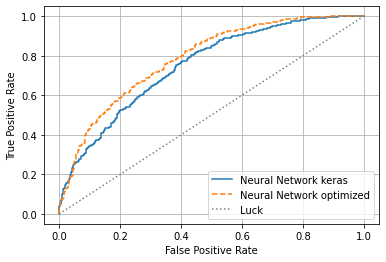

In [21]:
# plot ROC curve
plt.plot(fpr_nn, tpr_nn, label='Neural Network keras') # plot random forest ROC
plt.plot(fpr_nn_opt, tpr_nn_opt, linestyle='dashed', label='Neural Network optimized') # plot neural network ROC
plt.plot([0, 1], [0, 1], linestyle='dotted', color='grey', label='Luck') # plot diagonal line to indicate luck
plt.xlabel('False Positive Rate') # x-axis label
plt.ylabel('True Positive Rate') # y-axis label
plt.grid() # add a grid to the plot
plt.legend() # add a legend

In [22]:
filename = {
    'ttbar':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ttbar.root',
    'WZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/WZ.root',
    'ZZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ZZ.root',
    'signal_charm':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/signal_charm.root'
    }

'''
filename = {
    'ttbar':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ttbar.root',
    'WZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/WZ.root',
    'ZZ':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/ZZ.root',
    'signal_up':'/Users/mghasemi/Desktop/IPM/plotter/newtrees/signal_up.root'}
    }
'''
VARS = ['jetNo','jetPTLeading', 'jetETA', 'jetPHI','bjetPT', 'bjetETA',
        'elecPTLeading', 'elecETA', 'elecPHI',
        'dielecCOS', 'dielecETA', 'met','testnonTopMass'] # choose which vars to use (2d)

upfile = {}
params = {}
df = {}

# define trees and branches to make DataFrame
for treename in filename.keys():
    upfile[treename] = uproot.open(filename[treename])
    params[treename] = upfile[treename][treename].arrays(VARS)
    df[treename] = ak.to_dataframe(params[treename])
    # add isSignal variable
    if treename.startswith("signal"): 
        df[treename]['isSignal'] = np.ones(len(df[treename])) 
    else:
        df[treename]['isSignal'] = np.zeros(len(df[treename])) 

NDIM = len(VARS)
df_all = pd.concat([df[treename] for treename in filename.keys()])
dataset = df_all.values
X = dataset[:,0:NDIM]
Y = dataset[:,NDIM]

#X_train_val = scaler.transform(X_train_val)
#X_test = scaler.transform(X_test)

In [23]:
y_pred_RF_opt = opt_model.predict(X_test).round() # make predictions on the test data
y_pred_RF_train_opt = opt_model.predict(X_train_val).round()
y_pred_RF_tot_opt = opt_model.predict(scaler.transform(X)).round()

# See how well the classifier does, Acc = correct data / tot data
# The accuracy score is defined as the ratio of correctly identified data points to all data points.
print("Test accuracy:", accuracy_score(Y_test, y_pred_RF_opt))
print("Train accuracy", accuracy_score(Y_train_val, y_pred_RF_train_opt))
print("Total accuracy", accuracy_score(Y, y_pred_RF_tot_opt))

print("Classification report for the test set")
print(classification_report(Y_test.round(), y_pred_RF_opt.round(), target_names=['background', 'signal']))
#print("Classification report for the train set")
#print(classification_report(Y_train_val.round(), y_pred_RF_train.round(), target_names=['background', 'signal']))
print("Classification report for the total set")
print(classification_report(Y.round(), y_pred_RF_tot_opt.round(), target_names=['background', 'signal']))

df_all['dense_RF_opt'] = opt_model.predict(scaler.transform(X)).round() # add prediction to array

3060/3060 [==============================] - 2s 789us/step
Test accuracy: 0.6977087952697709
Train accuracy 0.8314855875831486
Total accuracy 0.6215426727131593
Classification report for the test set
              precision    recall  f1-score   support

  background       0.68      0.73      0.70       666
      signal       0.72      0.67      0.69       687

    accuracy                           0.70      1353
   macro avg       0.70      0.70      0.70      1353
weighted avg       0.70      0.70      0.70      1353

Classification report for the total set
              precision    recall  f1-score   support

  background       0.07      0.82      0.13      3265
      signal       0.99      0.61      0.76     94643

    accuracy                           0.62     97908
   macro avg       0.53      0.72      0.44     97908
weighted avg       0.96      0.62      0.74     97908

3060/3060 [==============================] - 3s 861us/step


In [25]:
df_all[(df_all['isSignal'] == 1) & (df_all['dense_RF_opt']==0)].head()
print(len(df_all[(df_all['isSignal'] == 1) & (df_all['dense_RF_opt']==0)]))
print(len(df_all[(df_all['isSignal'] == 0) & (df_all['dense_RF_opt']==1)]))
#len(df_all[(df_all['isSignal'] == 1)])

36475
579


## Baysian Optimization for NN model

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
#from bayes_opt import BayesianOptimization
from kerastuner.tuners import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
from sklearn.model_selection import RandomizedSearchCV

LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Load dataset
trainSet = pd.read_csv('/Users/mghasemi/Desktop/Code-factory/Python/ML/Kaggle/competitions/Titanic/input/train.csv')
# Feature generation: training data
train = trainSet.drop(columns=['Name', 'Ticket', 'Cabin'])
train = train.dropna(axis=0)
train = pd.get_dummies(train)
# train validation split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['PassengerId','Survived'], axis=0),
                                                  train['Survived'],
                                                  test_size=0.2, random_state=111,
                                                  stratify=train['Survived'])                                                  

# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score


# Set paramaters
params_nn ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100)
}
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo, params_nn, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)